In [2]:
#data management and custom functions
from pathlib import Path
from webfish_tools.util import pil_imread
import tifffile as tf
from chromatic_aberration_correction import *
#plotting packages
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Paths to image

In [14]:
tiff_src = "/groups/CaiLab/personal/Lex/raw/020822_erna_dash_tf/chromatic_aberration/MMStack_Pos0.ome.tif"

# Get offsets and corrected image

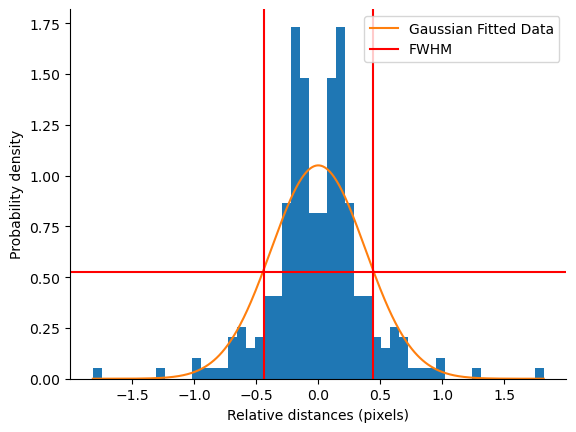

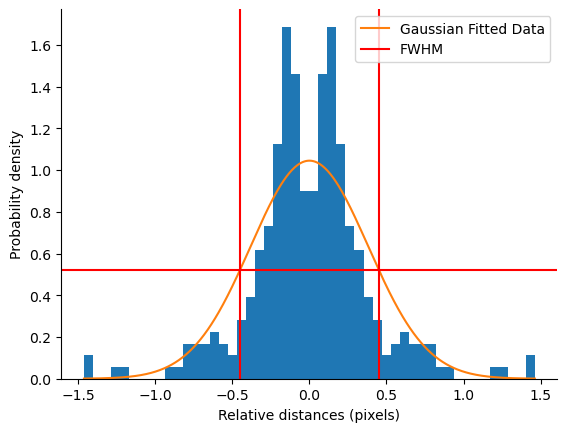

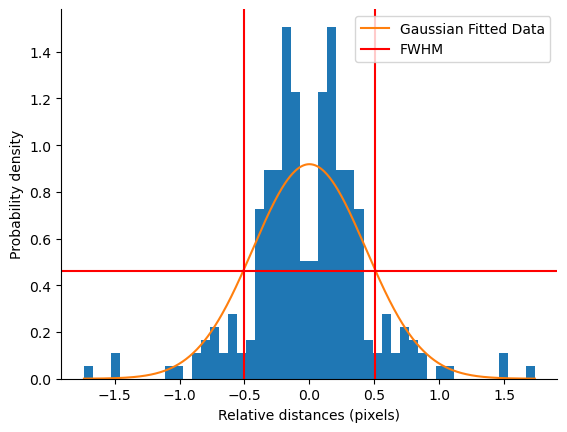

This task took 0.5614151159922282 min


In [16]:
import time
start = time.time()
transformed_image, error, tform = chromatic_corr_offsets(tiff_src,region_size=9, min_distance=10, 
                                                         threshold_abs=500, num_peaks=500,use_488 = False,
                                                         max_dist=5,ransac_threshold = 0.5, swapaxes=True)
print(f"This task took {(time.time()-start)/60} min")

In [17]:
#alignment error
error

[[0, 0.8682893290916948, 0.8811918074069696],
 [1, 0.8742684556726189, 0.8969938599134522],
 [2, 0.8656674737120814, 1.0090463866989974]]

In [18]:
#look at transformation matrix
tform

[array([[9.99420000e-01, 8.75587124e-06, 1.23791211e+00],
        [1.22638524e-05, 9.99258807e-01, 3.38774324e+00]]),
 array([[ 9.99037044e-01, -2.26860764e-06,  1.98018192e+00],
        [ 4.22489347e-05,  9.98937297e-01,  3.77025812e+00]]),
 array([[9.98772440e-01, 3.66153812e-05, 2.36695271e+00],
        [6.86150827e-05, 9.98532660e-01, 4.29882044e+00]])]

# Compare corrected and original image

In [ ]:
def plot_2d_image(img_2d, zmax=1000, animation = True):
    
    if animation == True:   
    #For Plotting 2d image
        #-------------------------------------------
        fig = px.imshow(
            img_2d,
            width=700,
            height=700,
            binary_string=True,
            binary_compression_level=4,
            binary_backend='pil',
            zmax = zmax,
            animation_frame=0
        )
        #-------------------------------------------

        fig.show()
    else:
        #For Plotting 2d image
        #-------------------------------------------
        fig = px.imshow(
            img_2d,
            width=700,
            height=700,
            binary_string=True,
            binary_compression_level=4,
            binary_backend='pil',
            zmax = zmax,
        )
        #-------------------------------------------

        fig.show()

In [ ]:
#read in images
original = pil_imread(tiff_src, swapaxes=True)
original_max= np.max(original, axis=0)
transformed_max = np.max(transformed_image,axis=0)

In [ ]:
#original
plot_2d_image(original_max, zmax=4000, animation = True)

In [ ]:
#corrected
plot_2d_image(transformed_max, zmax=4000, animation = True)

# Apply tform

In [ ]:
# from pathlib import Path
# from webfish_tools.util import find_matching_files

In [ ]:
# JOB_ID = 0
# directory = Path("/groups/CaiLab/personal/Lex/raw/112221_20kdash_3t3/notebook_pyfiles/dapi_aligned/")
# position_name = f'MMStack_Pos{JOB_ID}.ome.tif'

In [ ]:
# #hybcycle images
# files, _, _ = find_matching_files(directory, 'HybCycle_{hyb}' + f'/{position_name}')
# files = [str(f) for f in files]

In [ ]:
# files

In [ ]:
# #reference image
# ref_directory = "/groups/CaiLab/personal/Lex/raw/112221_20kdash_3t3/chromatic_aberration_lb/new_probes_5/new_probes_5_MMStack_Pos0.ome.tif"

# #get offsets
# _, _, tform = chromatic_corr_offsets(ref_directory,region_size=7, min_distance=10, 
#                           threshold_abs=500, num_peaks=500, max_dist=5,
#                           include_dapi=False, swapaxes=True)

# #apply offsets
# apply_chromatic_corr(ref_directory, tform, cores = 12, include_dapi=False, swapaxes=True, write = True)

In [ ]:
# #read in corrected
# hyb_corr = pil_imread("/groups/CaiLab/personal/Lex/raw/112221_20kdash_3t3/notebook_pyfiles/aberration_corrected/HybCycle_2/MMStack_Pos0.ome.tif")
# #corrected
# plot_2d_image(hyb_corr[0], zmax=4000, animation = True)

In [ ]:
# #read in corrected
# hyb_corr = pil_imread("/groups/CaiLab/personal/Lex/raw/112221_20kdash_3t3/aberration_corrected/new_probes_5/new_probes_5_MMStack_Pos0.ome.tif")
# hyb_corr = np.max(hyb_corr, axis=0)
# #corrected
# plot_2d_image(hyb_corr, zmax=4000, animation = True)

# Check average error

In [19]:
poss = np.arange(0,60,1)
error_list = []
for pos in poss:
    src = f"/groups/CaiLab/personal/Lex/raw/020822_erna_dash_tf/chromatic_aberration/MMStack_Pos{pos}_error.txt"
    error = pd.read_csv(src, sep = " ", header=None)
    error_list.append(error)

In [20]:
comb_error = pd.concat(error_list)
comb_error.columns = ["channel", "percent improvement", "fwhm"]

In [21]:
comb_error.groupby("channel").mean()

,percent improvement,fwhm
channel,,
0,0.882130,0.791156
1,0.876982,0.909271
2,0.861491,1.062950


In [22]:
comb_error.groupby("channel").std()

,percent improvement,fwhm
channel,,
0,0.018563,0.119142
1,0.020028,0.135905
2,0.026303,0.140790
